**Step 1:** Download the dataset as zip file using the below link:

https://www.kaggle.com/datasets/hojjatk/mnist-dataset?resource=download

**Step 2:** Upload the downloaded zip file in the colab.

**Step 3:** then replace "/content/archive\ \(5\).zip" this part of below code with your file path.(file path of uploaded zip file in the colab)

In [1]:
!ls -lh /content/archive\ \(5\).zip

-rw-r--r-- 1 root root 23M Dec 13 17:13 '/content/archive (5).zip'


EXECUTE ALL THE BLOCKS OF CODE, YOU WILL RECIEVE THE EXPECTED OUTPUT.

In [3]:
import zipfile

# Define the path to the zip file
zip_file_path = "/content/archive (5).zip"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/mnist_dataset')


In [4]:
import os

# List the contents of the extracted directory
os.listdir('/content/mnist_dataset')


['train-labels.idx1-ubyte',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images.idx3-ubyte',
 't10k-images.idx3-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte',
 't10k-labels.idx1-ubyte']

In [5]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit the model input (28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5937 - loss: 1.3263 - val_accuracy: 0.8553 - val_loss: 0.4781
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8699 - loss: 0.4425 - val_accuracy: 0.8937 - val_loss: 0.3580
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8964 - loss: 0.3530 - val_accuracy: 0.9060 - val_loss: 0.3192
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9121 - loss: 0.2963 - val_accuracy: 0.9165 - val_loss: 0.2817
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9195 - loss: 0.2768 - val_accuracy: 0.9259 - val_loss: 0.2506
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9303 - loss: 0.2374 - val_accuracy: 0.9337 - val_loss: 0.2239
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9378 - loss: 0.2139 - val_accuracy: 0.9416 - val_loss: 0.2004
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9443 - loss: 0.1894 

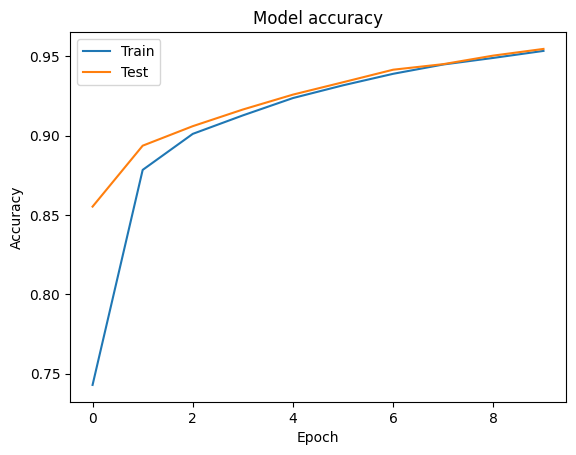

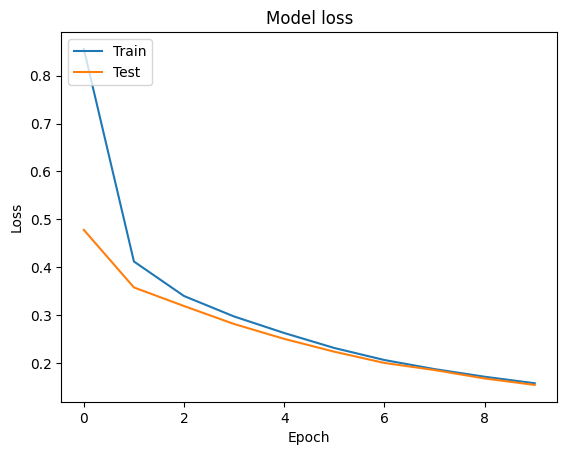

In [6]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Step 1: Load and preprocess the dataset
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit the model input (28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Step 2: Define the ANN Model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Flatten the input image
model.add(layers.Dense(128, activation='relu'))       # First hidden layer
model.add(layers.Dense(64, activation='relu'))        # Second hidden layer
model.add(layers.Dense(10, activation='softmax'))     # Output layer for 10 classes (digits 0-9)

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Optional: Plot Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

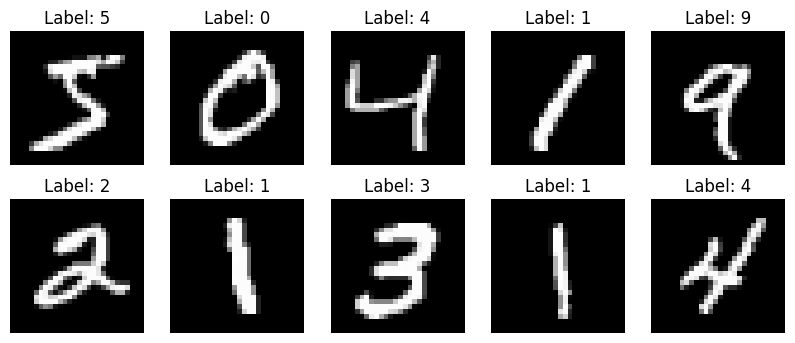

In [7]:
import matplotlib.pyplot as plt

# Visualize some training images
num_images = 10  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for display
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()
